## Imports

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv("./Cleaned_insurance_claims_data.csv")

## Feature Engineering

In [52]:
df['total_premiums_paid'] = (df['policy_annual_premium']/12) * df['months_as_customer']

# Write the DataFrame back to the CSV file
df.to_csv('insurance_claims_updated.csv', index=False)

In [53]:
df['net_value_of_customer'] = df['total_premiums_paid'] - df['total_claim_amount']

df.to_csv('insurance_claims_updated.csv', index=False)

In [54]:
bin_edges = [0, 30, 55, 100]  # Define the bin edges
bin_labels = ['Young Adult', 'Middle Aged', 'Elderly']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['ages_category'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels)

df.to_csv('insurance_claims_updated.csv', index=False)

In [55]:
bin_edges_customer = [0, 25, 150, 500]  # Define the bin edges
bin_labels_customer = ['New Client', 'Established Client', 'Long-Term Client']  # Corresponding labels for each bin

# Create a new column based on the bin labels
df['customer_category'] = pd.cut(df['months_as_customer'], bins=bin_edges_customer, labels=bin_labels_customer)

df.to_csv('insurance_claims_updated.csv', index=False)

In [56]:
# Convert policy bind date and incident date columns to datetime objects
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Calculate the duration of each policy by subtracting the policy bind date from the incident date
df['policy_duration'] = df['incident_date'] - df['policy_bind_date']

# Convert the duration to years
df['policy_duration_days'] = df['policy_duration'].dt.days/365

df.to_csv('insurance_claims_updated.csv', index=False)

In [57]:
# Convert policy bind date column to datetime objects
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])

# Calculate the age of the insured at the time of policy binding
df['age_at_policy_binding'] = df['policy_bind_date'].dt.year - df['age']

df.to_csv('insurance_claims_updated.csv', index=False)

In [58]:
# Calculate the claim severity ratio
df['claim_severity_ratio'] = df['total_claim_amount'] / df['policy_annual_premium']

df.to_csv('insurance_claims_updated.csv', index=False)

In [59]:
df['claim_severity_ratio'].describe()


count    1000.000000
mean       43.731803
std        24.590623
min         0.067452
25%        32.353492
50%        44.975200
75%        58.668974
max       157.988148
Name: claim_severity_ratio, dtype: float64

In [60]:
# Define the thresholds for claim severity ratio bins
thresholds = [0, 10, 30, 60, 100, 160] 
# Define labels for the bins
labels = ['Low', 'Medium', 'Medium-High', 'High', 'Severe']

# Create a new column based on the claim severity ratio bins
df['claim_severity_category'] = pd.cut(df['claim_severity_ratio'], bins=thresholds, labels=labels, right=False)

df.to_csv('insurance_claims_updated.csv', index=False)

In [61]:
# Convert incident date column to datetime objects
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Calculate the age of the insured vehicle at the time of the incident
df['vehicle_age_at_incident'] = df['incident_date'].dt.year - df['auto_year']

df.to_csv('insurance_claims_updated.csv', index=False)

In [62]:
# Extract the month and year from the incident date
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

df.to_csv('insurance_claims_updated.csv', index=False)

In [79]:
column_names = df.columns.tolist()

print(column_names)

['months_as_customer', 'age', 'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'capital-gains', 'capital-loss', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'property_damage', 'bodily_injuries', 'witnesses', 'Unnamed: 30', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make', 'auto_model', 'auto_year', 'fraud_reported', 'total_premiums_paid', 'net_value_of_customer', 'ages_category', 'customer_category', 'policy_duration', 'policy_duration_days', 'age_at_policy_binding', 'claim_severity_ratio', 'claim_severity_category', 'vehicle_age_at_incident', 'incident_month', 'incident_year']


## EDA

For this project I would like to investigate where majority of claims are coming from and possibly find a new target market the insurance company should focus on marketing towards in order to boost revenue. This is the info i will be focusing on: 

- Demographic information: age, insured_sex, insured_education_level, insured_occupation, insured_relationship
- Policy details: policy_state, policy_csl, policy_deductable, policy_annual_premium
- Incident details: incident_type, collision_type, incident_severity, authorities_contacted, incident_state, incident_city, incident_hour_of_the_day
- Claim details: total_claim_amount, injury_claim, property_claim, vehicle_claim
- Auto details: auto_make, auto_model, auto_year
- Fraud indicator: fraud_reported

### Demographic Information

#### Age

In [63]:
#Calculate summary statistics for the 'age' column
age_summary = df['age'].describe()

# Print the summary statistics
print("Summary Statistics for Age:")
print(age_summary)

Summary Statistics for Age:
count    1000.000000
mean       38.961000
std         9.126378
min        19.000000
25%        32.000000
50%        38.000000
75%        44.000000
max        64.000000
Name: age, dtype: float64


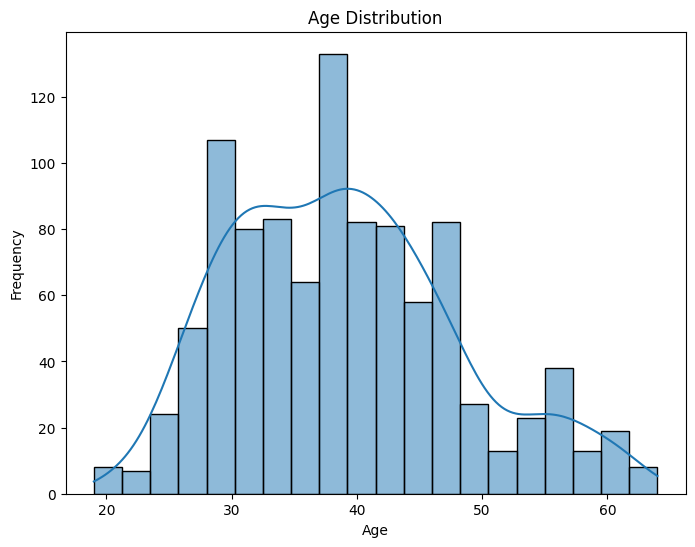

In [64]:
# Plot histogram for age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

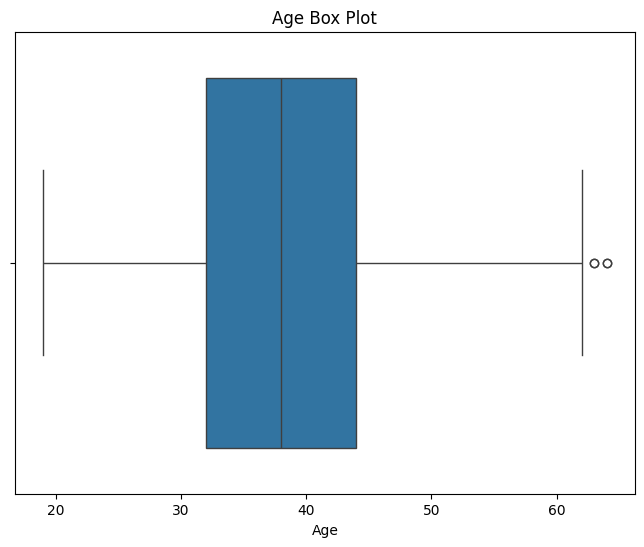

In [65]:
# Box plot for age
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)
plt.title('Age Box Plot')
plt.xlabel('Age')
plt.show()

Majority of insured ages are betweeb 30 and 45 with a range between 19 and 64

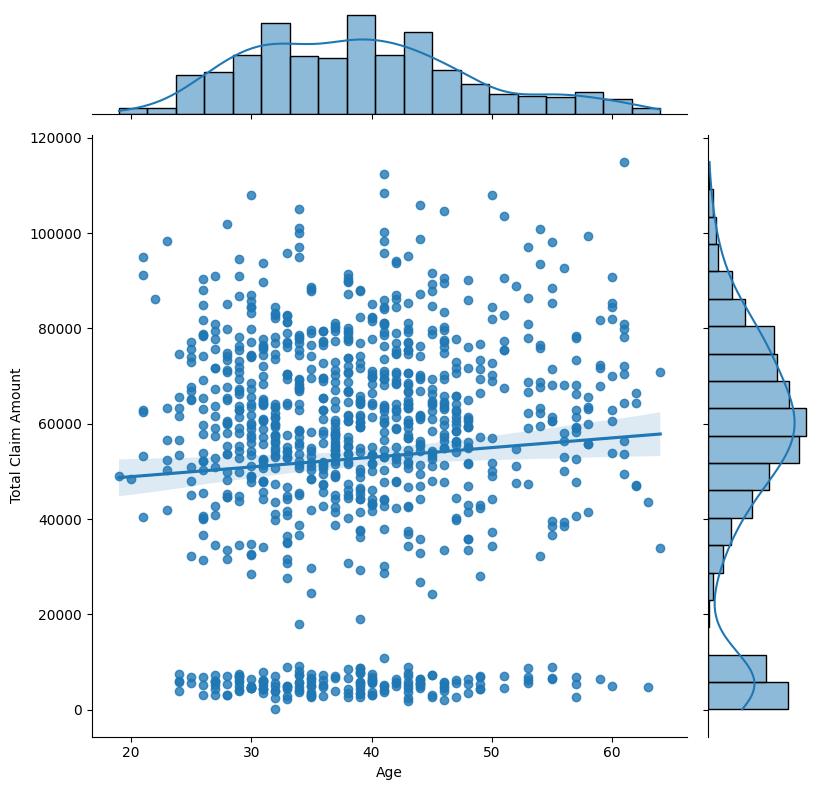

In [66]:
sns.jointplot(x=df['age'], y=df['total_claim_amount'], kind='reg', height=8)
plt.xlabel('Age')
plt.ylabel('Total Claim Amount')
plt.show()

The total claim amount seems to be highest for 30-45 year olds and lowest with the 20 year old age groups as well as the 60-65 age group.

Majority of claims are also coming from ages 25-50, with the lowest being for the younger below 20 and abover 60. However, this may not be significant as the younger groups have been driving for a shorter time and the older groups may not travel as much. 

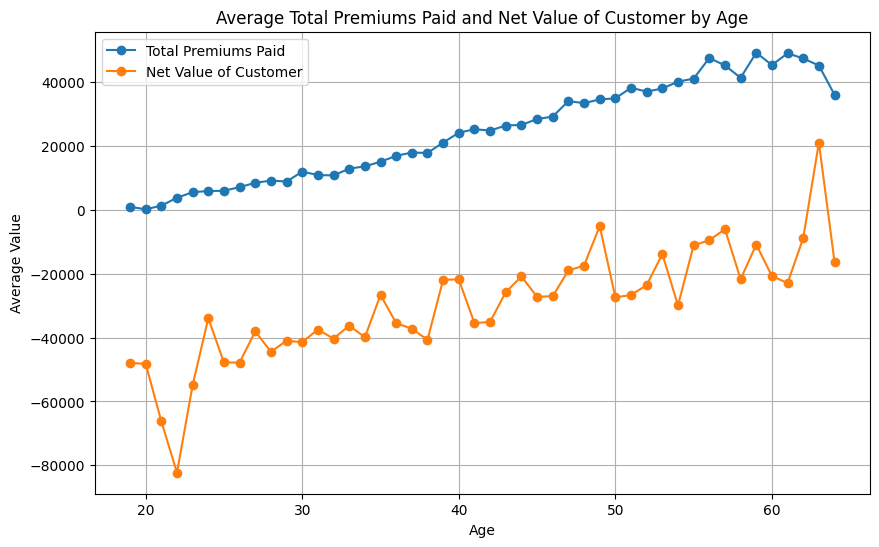

In [67]:
premiums_by_age = df.groupby('age')['total_premiums_paid'].mean()
net_value_by_age = df.groupby('age')['net_value_of_customer'].mean()

plt.figure(figsize=(10, 6))
plt.plot(premiums_by_age.index, premiums_by_age.values, label='Total Premiums Paid', marker='o')
plt.plot(net_value_by_age.index, net_value_by_age.values, label='Net Value of Customer', marker='o')
plt.title('Average Total Premiums Paid and Net Value of Customer by Age')
plt.xlabel('Age')
plt.ylabel('Average Value')
plt.legend()
plt.grid(True)
plt.show()

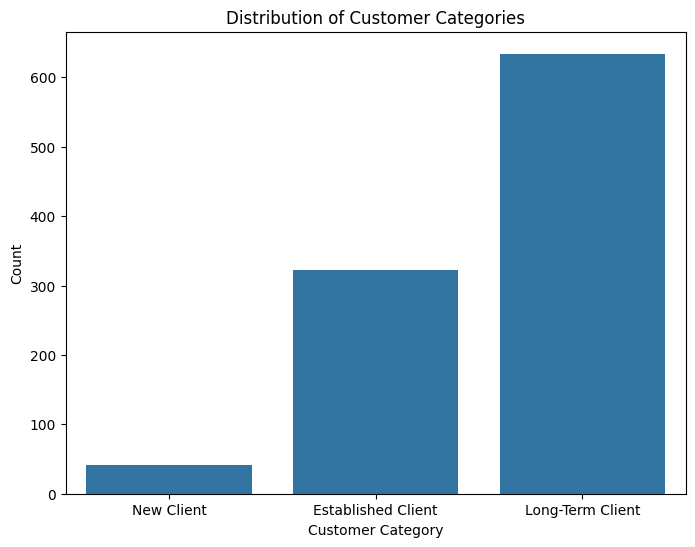

In [68]:
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_category', data=df, order=bin_labels_customer)
plt.title('Distribution of Customer Categories')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.show()

There are many long-term clients but few new clients. How can we get new clients? 

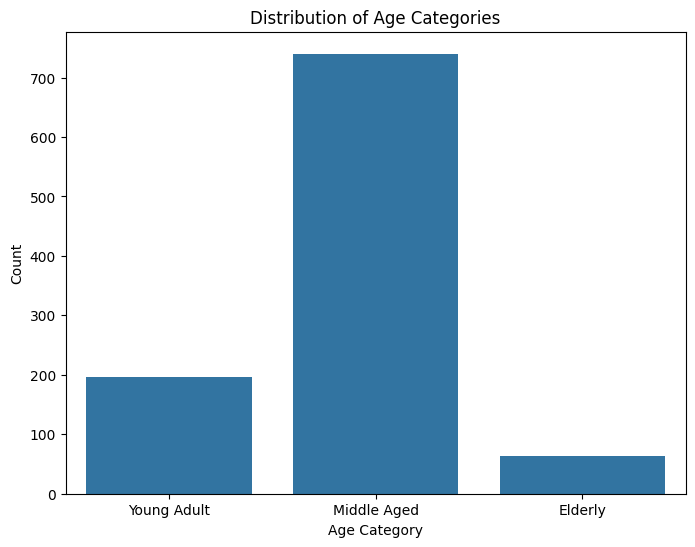

In [69]:
plt.figure(figsize=(8, 6))
sns.countplot(x='ages_category', data=df, order=bin_labels)
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.show()

C:\Users\rooke\AppData\Local\Temp\ipykernel_9644\189873437.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fraud_reported', data=df, palette='Set1')


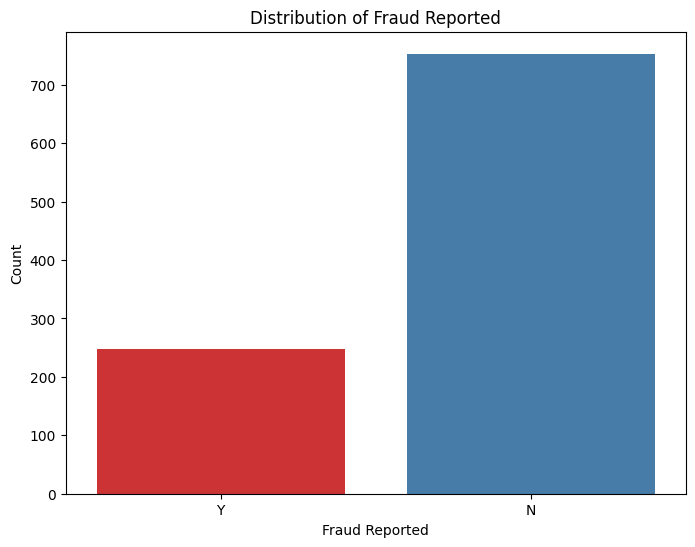

In [70]:
plt.figure(figsize=(8, 6))
sns.countplot(x='fraud_reported', data=df, palette='Set1')
plt.title('Distribution of Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

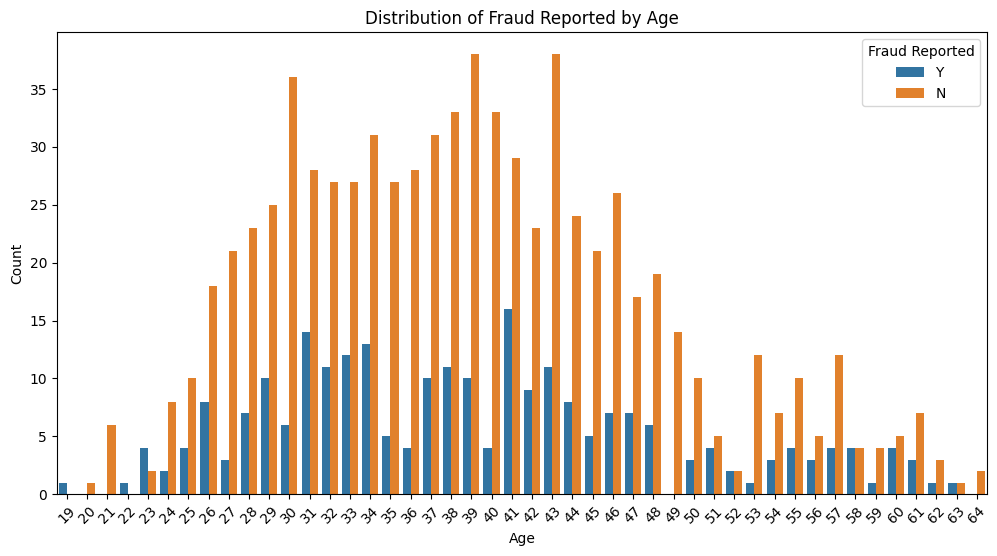

In [71]:
plt.figure(figsize=(12, 6))
sns.countplot(x='age', hue='fraud_reported', data=df)
plt.title('Distribution of Fraud Reported by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.xticks(rotation=45)
plt.show()

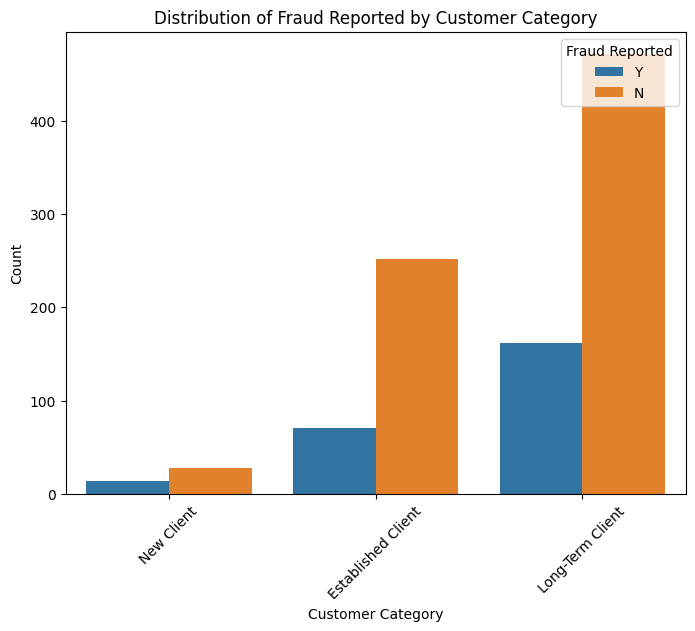

In [72]:
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_category', hue='fraud_reported', data=df, order=bin_labels_customer)
plt.title('Distribution of Fraud Reported by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.legend(title='Fraud Reported', loc='upper right')
plt.xticks(rotation=45)
plt.show()

#### Sex

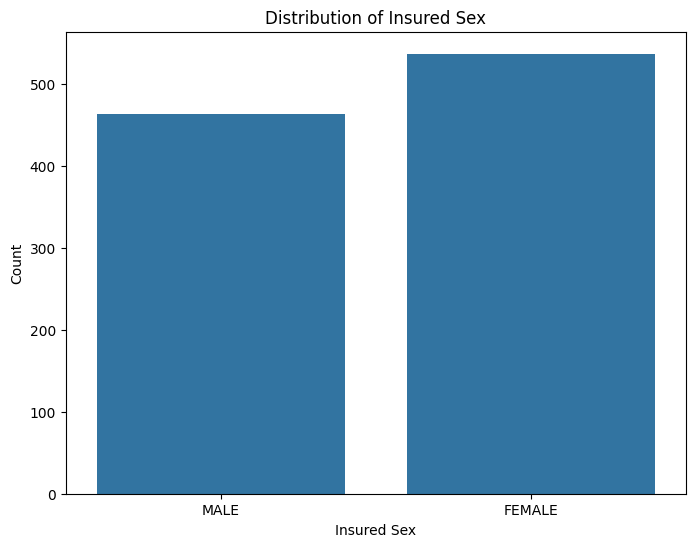

In [73]:
# Create count plot for Insured Sex
plt.figure(figsize=(8, 6))
sns.countplot(x='insured_sex', data=df)
plt.title('Distribution of Insured Sex')
plt.xlabel('Insured Sex')
plt.ylabel('Count')
plt.show()

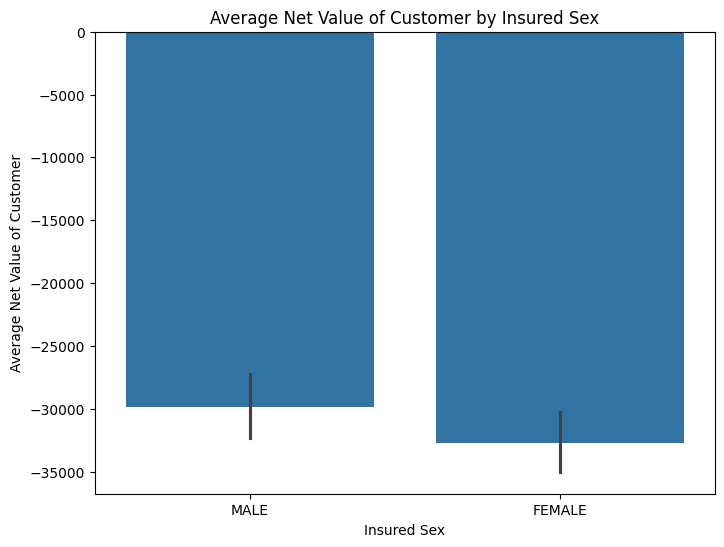

In [74]:
plt.figure(figsize=(8, 6))
sns.barplot(x='insured_sex', y='net_value_of_customer', data=df)
plt.title('Average Net Value of Customer by Insured Sex')
plt.xlabel('Insured Sex')
plt.ylabel('Average Net Value of Customer')
plt.show()

There is no great significance

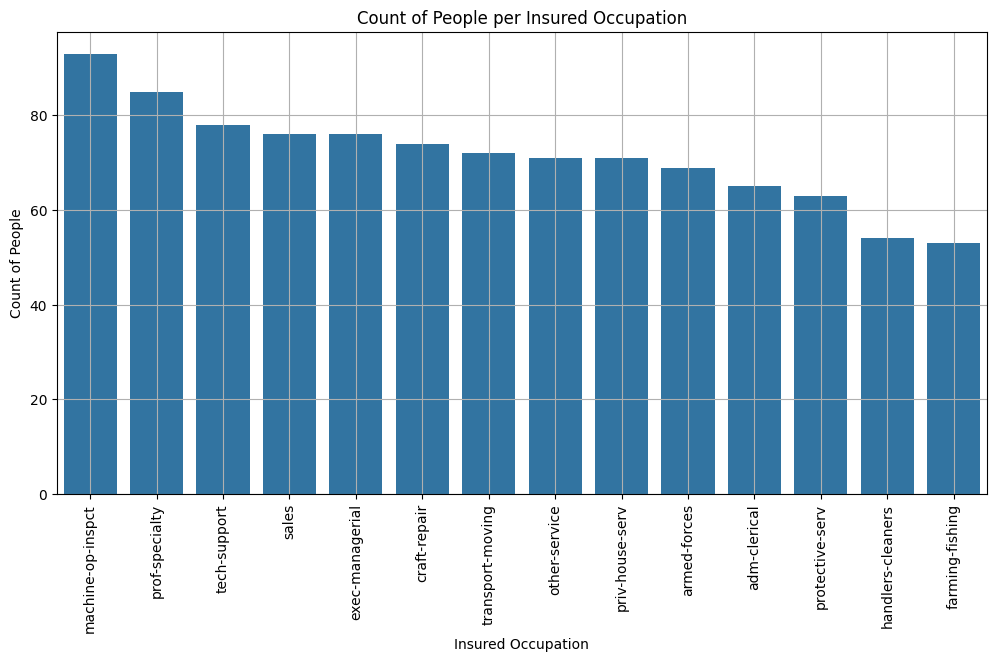

In [75]:
plt.figure(figsize=(12, 6))
sns.countplot(x='insured_occupation', data=df, order=df['insured_occupation'].value_counts().index)
plt.title('Count of People per Insured Occupation')
plt.xlabel('Insured Occupation')
plt.ylabel('Count of People')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

#### Education

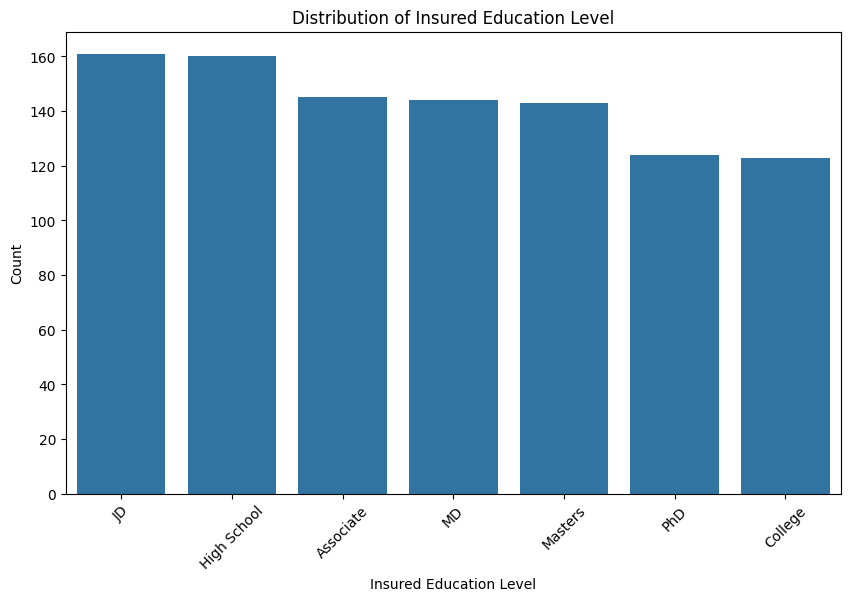

In [76]:
# Create count plot for Insured Education Level
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_education_level', data=df, order=df['insured_education_level'].value_counts().index)
plt.title('Distribution of Insured Education Level')
plt.xlabel('Insured Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


there is no great signifcance


#### Insured Relationship 

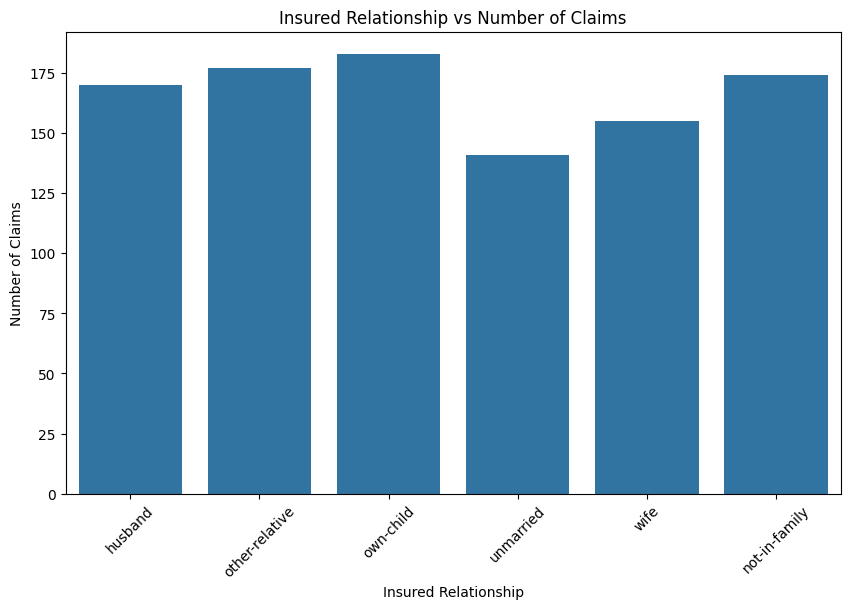

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x='insured_relationship', data=df)
plt.title('Insured Relationship vs Number of Claims')
plt.xlabel('Insured Relationship')
plt.ylabel('Number of Claims')
plt.xticks(rotation=45)
plt.show()

C:\Users\rooke\AppData\Local\Temp\ipykernel_9644\1877503896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_severity_category', data=df, order=labels, palette='viridis')


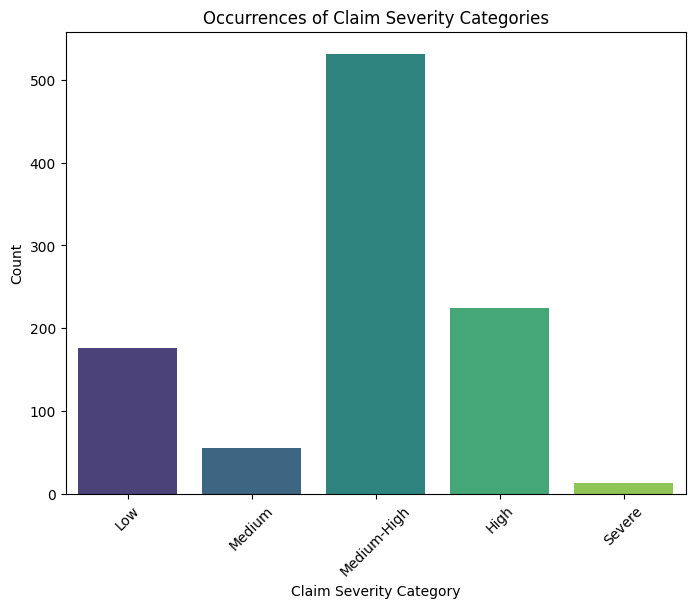

In [78]:
# Plot the occurrences of each claim severity category
plt.figure(figsize=(8, 6))
sns.countplot(x='claim_severity_category', data=df, order=labels, palette='viridis')
plt.title('Occurrences of Claim Severity Categories')
plt.xlabel('Claim Severity Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()